In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates
from os import listdir
from os import walk
from os.path import join
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

myfont=FontProperties(fname=r'C:\Windows\Fonts\微軟正黑體.ttf',size=40)
sns.set(style="whitegrid", font="微軟正黑體")

# plt.xlabel(u"橫坐標xlabel",fontproperties=myfont)

In [26]:
load_path = r"C:\Users\Andy\Desktop\洪災\報告\11-27"
save_path = load_path + "\plots"
files = listdir(load_path)

full_path = []
file_names = []
for root, dirs, files in walk(load_path):
  for f in files:
    full_path.append(join(root, f))
    file_names.append(join(root, f)[len(load_path)+1:-5])

items = iter(range(len(full_path)))

In [3]:
def get_data():

    item = next(items)
    data = pd.read_excel(full_path[item], sheet_name="工作表2")
    file_name = file_names[item]
    
    print(file_names[item])
    print(data.head())

    return file_name, data

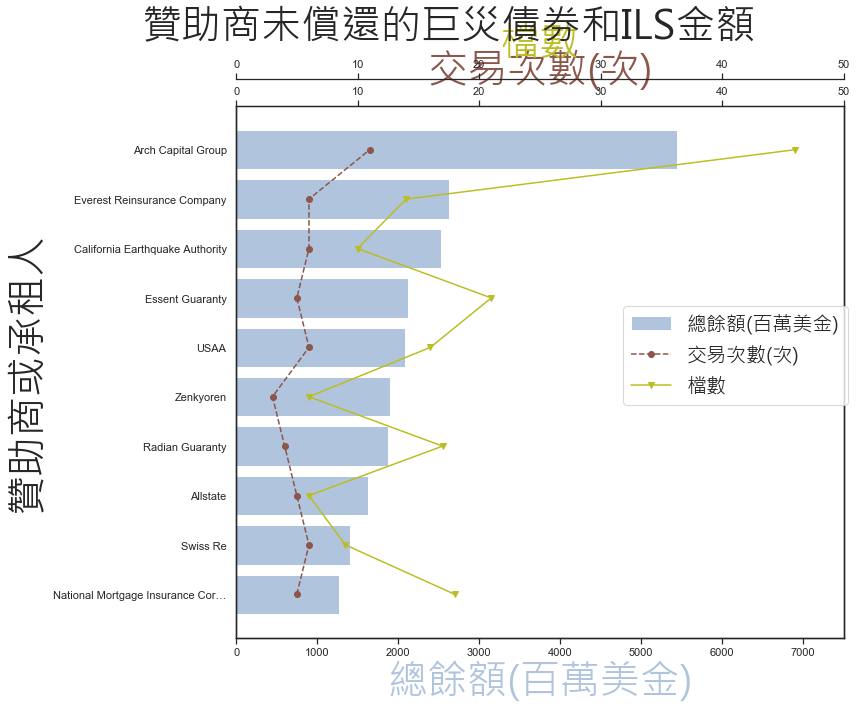

In [28]:
data = pd.read_excel(r"C:\Users\Andy\Desktop\洪災\報告\11-27\Catastrophe bonds & ILS outstanding by sponsor.xlsx", sheet_name="工作表2")
data = data.sort_values(by ='總餘額(百萬美金)')[-10:]

fig = plt.figure(figsize=(12,10))
plt.style.use('seaborn-ticks')

ax1 = fig.add_subplot(111)
ax1.barh(data["贊助商或承租人"], data["總餘額(百萬美金)"], color = "#B0C4DE", label='總餘額(百萬美金)')
ax1.set_xlabel("總餘額(百萬美金)", color="#B0C4DE", fontproperties=myfont)
ax1.set_ylabel("贊助商或承租人", fontproperties=myfont)
rspine = ax1.spines['bottom']
rspine.set_position(('axes', -0.0))
ax1.xaxis.set_label_position("bottom")
plt.xlim((0,7500))

ax2 = ax1.twiny()
ax2.plot(data["交易數量"], data["贊助商或承租人"] , '--',  color = "tab:brown", marker = "o", label='交易次數(次)')
ax2.set_xlabel("交易次數(次)",  color = "tab:brown", fontproperties=myfont)
rspine = ax2.spines['top']
rspine.set_position(('axes', 1.00))
ax2.xaxis.set_label_position("top")
plt.xlim((0,50))

ax3 = ax1.twiny()
ax3.plot(data["檔數"], data["贊助商或承租人"] , '-ok',  color = "tab:olive", marker = "v", label='檔數')
ax3.set_xlabel("檔數",  color = "tab:olive", fontproperties=myfont)
rspine = ax3.spines['top']
rspine.set_position(('axes', 1.05))
ax3.xaxis.set_label_position("top")
plt.xlim((0,50))

fig.legend(loc='center right', frameon=True, prop = FontProperties(fname=r'C:\Windows\Fonts\微軟正黑體.ttf',size=20))

plt.title('贊助商未償還的巨災債券和ILS金額', x= 0.35, y=1.1, pad=14, 
            fontproperties=FontProperties(fname=r'C:\Windows\Fonts\微軟正黑體.ttf',size=40))

plt.tight_layout()
plt.savefig(save_path + "\Catastrophe bonds & ILS outstanding by sponsor")

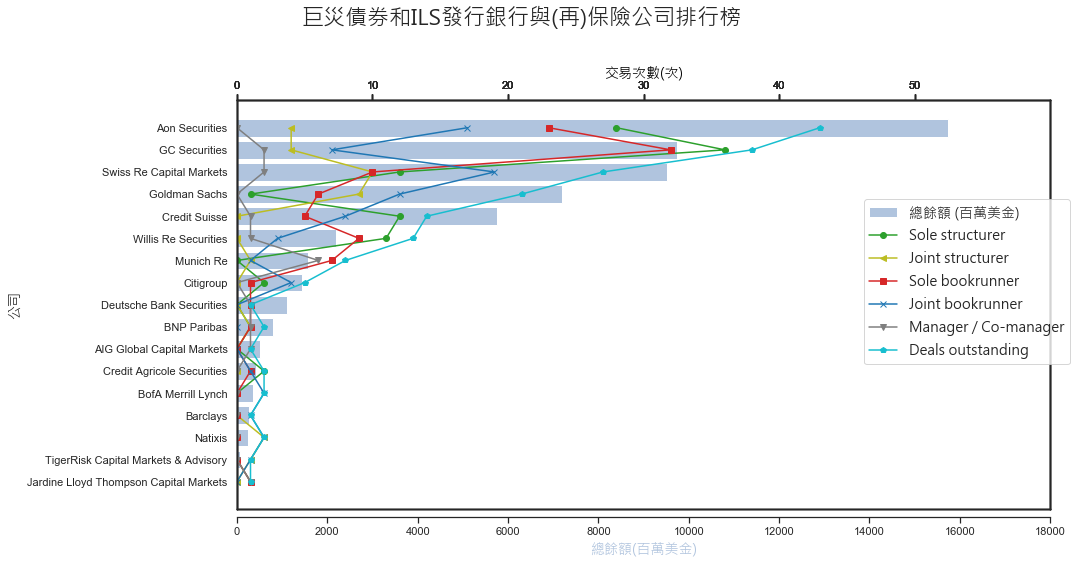

In [116]:
data = pd.read_excel(r"C:\Users\Andy\Desktop\洪災\報告\11-27\Catastrophe bond and ILS issuance banks & brokers leaderboard.xlsx", sheet_name="工作表2")

fig = plt.figure(figsize=(15,8))
plt.style.use('seaborn-ticks')

ax1 = fig.add_subplot(111)
ax1.barh(data["Company"], data["$m"], color = '#B0C4DE', label='總餘額 (百萬美金)')
ax1.set_xlabel("總餘額(百萬美金)", color='#B0C4DE', fontproperties=myfont)
ax1.set_ylabel("公司", fontproperties=myfont)
rspine = ax1.spines['bottom']
rspine.set_position(('axes', -0.02))
ax1.xaxis.set_label_position("bottom")
plt.xlim((0,18000))
plt.xticks(np.arange(0,20000, step=2000))

ax2 = ax1.twiny()
ax2.plot(data["Sole structurer"], data["Company"] , '-ok',  color = "tab:green", marker = "o", label='Sole structurer')
ax2.set_xlabel("交易次數(次)",  color = "black", fontproperties=myfont)
rspine = ax2.spines['top']
rspine.set_position(('axes', 1))
ax2.xaxis.set_label_position("top")
plt.xlim((0,60))
plt.xticks(np.arange(0,60,step = 10))

ax3 = ax1.twiny()
ax3.plot(data["Joint structurer"], data["Company"] , '-ok',  color = "tab:olive", marker = "<", label='Joint structurer')
plt.xlim((0,60))
plt.xticks(np.arange(0,60,step = 10))

ax4 = ax1.twiny()
ax4.plot(data["Sole bookrunner"], data["Company"] , '-ok',  color = "tab:red", marker = "s", label='Sole bookrunner')
plt.xlim((0,60))
plt.xticks(np.arange(0,60,step = 10))

ax5 = ax1.twiny()
ax5.plot(data["Joint bookrunner"], data["Company"] , '-ok',  color = "tab:blue", marker = "x", label='Joint bookrunner')
plt.xlim((0,60))
plt.xticks(np.arange(0,60,step = 10))

ax6 = ax1.twiny()
ax6.plot(data["Manager / Co-manager"], data["Company"] , '-ok',  color = "tab:gray", marker = "v", label='Manager / Co-manager')
plt.xlim((0,60))
plt.xticks(np.arange(0,60,step = 10))

ax7 = ax1.twiny()
ax7.plot(data["No. deals"], data["Company"] , '-ok',  color = "tab:cyan", marker = "p", label='Deals outstanding')
plt.xlim((0,60))
plt.xticks(np.arange(0,60,step = 10))


fig.legend(loc='center right', frameon=True, prop=myfont)

plt.title('巨災債券和ILS發行銀行與(再)保險公司排行榜', x= 0.35, y=1.15, pad=14, fontproperties=FontProperties(fname=r'C:\Windows\Fonts\微軟正黑體.ttf',size=22))

plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig(save_path + "\Catastrophe bond and ILS issuance banks & brokers leaderboard")

In [1]:
data = pd.read_excel(r"C:\Users\Andy\Desktop\洪災\報告\11-27\Catastrophe bond and ILS issuance banks & brokers leaderboard.xlsx", sheet_name="工作表2")

fig = plt.figure(figsize=(15,8))
plt.style.use('seaborn-ticks')

ax1 = fig.add_subplot(111)
ax1.barh(data["Company"], data["$m"], color = '#B0C4DE', label='總餘額 (百萬美金)')
ax1.set_xlabel("總餘額(百萬美金)", color='#B0C4DE', fontproperties=myfont)
ax1.set_ylabel("公司", fontproperties=myfont)
rspine = ax1.spines['bottom']
rspine.set_position(('axes', -0.02))
ax1.xaxis.set_label_position("bottom")
plt.xlim((0,18000))
plt.xticks(np.arange(0,20000, step=2000))

ax2 = ax1.twiny()
ax2.plot(data["Sole structurer"], data["Company"] , '-ok',  color = "tab:green", marker = "o", label='Sole structurer')
ax2.set_xlabel("交易次數(次)",  color = "black", fontproperties=myfont)
rspine = ax2.spines['top']
rspine.set_position(('axes', 1))
ax2.xaxis.set_label_position("top")
plt.xlim((0,60))
plt.xticks(np.arange(0,60,step = 10))

ax3 = ax1.twiny()
ax3.plot(data["Joint structurer"], data["Company"] , '-ok',  color = "tab:olive", marker = "<", label='Joint structurer')
plt.xlim((0,60))
plt.xticks(np.arange(0,60,step = 10))

ax4 = ax1.twiny()
ax4.plot(data["Sole bookrunner"], data["Company"] , '-ok',  color = "tab:red", marker = "s", label='Sole bookrunner')
plt.xlim((0,60))
plt.xticks(np.arange(0,60,step = 10))

ax5 = ax1.twiny()
ax5.plot(data["Joint bookrunner"], data["Company"] , '-ok',  color = "tab:blue", marker = "x", label='Joint bookrunner')
plt.xlim((0,60))
plt.xticks(np.arange(0,60,step = 10))

ax6 = ax1.twiny()
ax6.plot(data["Manager / Co-manager"], data["Company"] , '-ok',  color = "tab:gray", marker = "v", label='Manager / Co-manager')
plt.xlim((0,60))
plt.xticks(np.arange(0,60,step = 10))

ax7 = ax1.twiny()
ax7.plot(data["No. deals"], data["Company"] , '-ok',  color = "tab:cyan", marker = "p", label='Deals outstanding')
plt.xlim((0,60))
plt.xticks(np.arange(0,60,step = 10))


fig.legend(loc='center right', frameon=True, prop=myfont)

plt.title('巨災債券和ILS發行銀行與(再)保險公司排行榜', x= 0.35, y=1.15, pad=14, fontproperties=FontProperties(fname=r'C:\Windows\Fonts\微軟正黑體.ttf',size=22))

plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig(save_path + "\Catastrophe bond and ILS issuance banks & brokers leaderboard")

NameError: name 'pd' is not defined

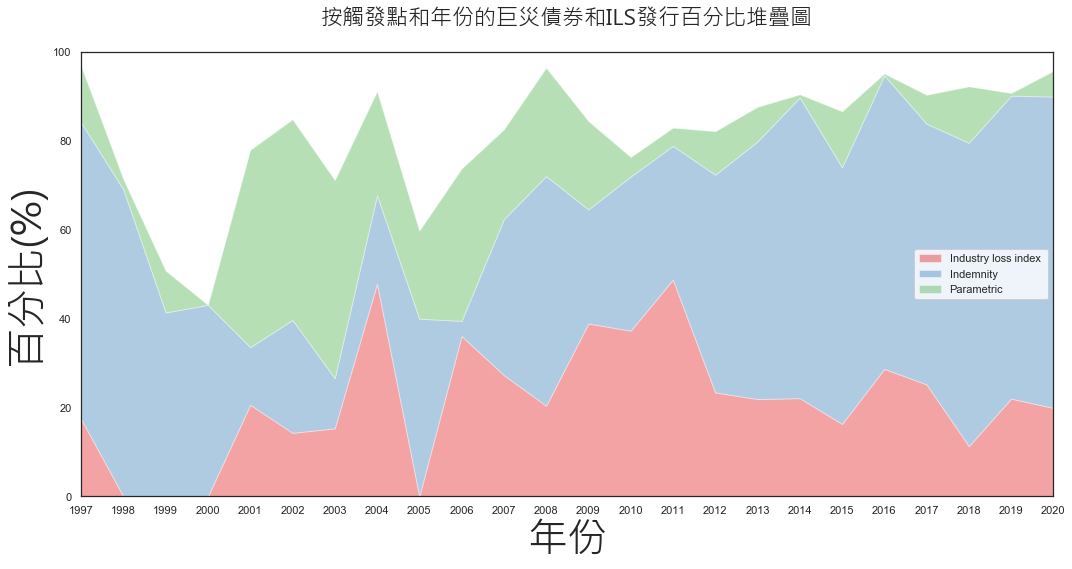

In [53]:
data = pd.read_excel(r"C:\Users\Andy\Desktop\洪災\報告\11-27\Catastrophe bonds and ILS issuance by trigger and by year.xlsx", sheet_name="工作表2")
data = data.iloc[:, [0,4,5,-2]]

label = data.columns.tolist()[1:]

x = data.iloc[:,0]

df = data.iloc[:,1:].values.tolist()
numpy_array = np.array(df)
transpose = numpy_array.T
y = transpose.tolist()

# plots
fig = plt.figure(figsize=(15,8))


pal = sns.color_palette("Set1")
plt.stackplot(x, y, labels=label, colors=pal, alpha=0.4 )
plt.xlim(1997,2020)
plt.xticks(np.arange(1997,2021, step=1))
plt.ylim(0,100)
plt.xlabel("年份", fontproperties=myfont)
plt.ylabel("百分比(%)", fontproperties=myfont)
plt.legend(loc='center right', frameon=True)

plt.title('按觸發點和年份的巨災債券和ILS發行百分比堆疊圖', x= 0.5, y=1.05, fontproperties=FontProperties(fname=r'C:\Windows\Fonts\微軟正黑體.ttf',size=22))

plt.tight_layout()
plt.savefig(save_path + "\Catastrophe bonds and ILS issuance by trigger and by year")

In [54]:
data = pd.read_excel(r"C:\Users\Andy\Desktop\洪災\報告\11-27\Catastrophe bonds and ILS issuance by trigger and by year.xlsx", sheet_name="工作表2")
data.head()

,年分,Longevity index,Medical benefit ratio,County-weighted index,Industry loss index,Indemnity,Modelled loss index,Mortality index,Multiple triggers,Parametric,Unknown
0,1997,0.0,0.0,0.0,17.4,66.8,0.0,0.0,0.0,12.7,3.1
1,1998,0.0,0.0,0.0,0.0,69.1,0.8,0.0,0.0,2.3,27.8
2,1999,0.0,0.0,0.0,0.0,41.4,28.1,0.0,0.0,9.4,21.2
3,2000,0.0,0.0,0.0,0.0,43.1,28.0,0.0,0.0,0.0,28.9
4,2001,0.0,0.0,0.0,20.6,13.0,22.0,0.0,0.0,44.4,0.0
